<a href="https://colab.research.google.com/github/liirusuk/llm_train/blob/main/Week_1_homework_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1. Exploring OpenAI tokenizer

In this task we'll continue experimenting with LLM tokenizers to better understand their properties and restrictions.

Let's make sure that we have the `tiktoken` library installed:

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.6 MB/s eta 0:00:00


Let's start by looking at some particular tokens.

**Task 1.1**. Print the subword unit (a string) corresponding to the token index 10101.

Food for thought:
Try to guess why do we have this strange string among tokens. It should have been quite frequent in the training data to appear as a token.

In [ ]:
import tiktoken

encoding = tiktoken.encoding_for_model('gpt-4o')

print(encoding.decode([10101]))

/**


Now, let's check the vocabulary size of GPT-4o. Web search can quickly give us the number 200k, but we want to be sure.

If we explore the `encoding` object a bit more deeply, we will find:

- `encoding._mergeable_ranks` contains regular `token:index` dictionary; its size is 199998.
- `encoding._special_tokens` contains two special tokens:

In [ ]:
encoding._special_tokens

{'<|endoftext|>': 199999, '<|endofprompt|>': 200018}

So, indeed we have 200k items in the dictionary.

**Task 1.2.** LLM's dictionary, that is the list of all subwords it uses as tokens, is trained on common crawl web data. How exactly it is done, you'll learn further in the course. Right now, we'll observe how the training set composition influences the behaviour of tokenization for different languages.

For this task, we've chosen four languages: English, French, Swahili, and Traditional Chinese. We generated a short story in Simple English about peasants and animals, and then we translated it to other languages using Google translate. Thus we've got a dictionary of four strings:
```
excerpts = {
    'English': ...,
    'French': ...,
    'Swahili': ...,
    'Chinese': ...
}
```

Find the length of tokenized sequences for each of these strings. Observe the difference.

**Food for thought.** Why did we choose such a naive topic for the short story? Why not adventures of a Little Brave Python in the world of Machine Learning? Why not just take the wikipedia article about Jacques-Louis David? Hint: that would damage the purity of our experiment.

The data is:

In [ ]:
excerpts = {
    'English': '''
Once upon a time, in a small village, there lived some kind peasants. They worked hard every day, taking care of their fields and animals. The peasants had cows, chickens, goats, and a big brown dog named Buddy.

Every morning, the peasants woke up early. They fed the chickens, who clucked happily. They milked the cows, who gave them fresh, sweet milk. The goats liked to jump and play, making everyone laugh. Buddy, the dog, helped keep the animals safe.

One day, a storm came. The wind blew hard, and the rain fell heavily. The peasants quickly brought all the animals into the big barn. Inside, it was warm and dry. The cows lay down on the soft hay. The chickens snuggled together on their perch. The goats found a corner to rest, and Buddy lay by the door, watching over everyone.

The storm lasted all night, but the peasants and their animals were safe in the barn. In the morning, the sun came out, and the storm was gone. The peasants opened the barn doors, and the animals went outside, happy and free.

The peasants fixed the fences and cleaned the barn. They worked together, helping each other and their animals. At the end of the day, they sat under a big tree, watching the sunset. Buddy lay at their feet, and the animals grazed nearby.

The village was peaceful, and the peasants were happy. They knew that as long as they took care of their animals and each other, they would always have a good life.

And so, they lived happily ever after.
''',
    'French': '''
Il était une fois, dans un petit village, de gentils paysans. Ils travaillaient dur chaque jour, prenant soin de leurs champs et de leurs animaux. Les paysans avaient des vaches, des poules, des chèvres et un gros chien brun nommé Buddy.

Chaque matin, les paysans se réveillaient tôt. Ils nourrissaient les poules qui glousaient joyeusement. Ils traitaient les vaches qui leur donnaient du lait frais et sucré. Les chèvres aimaient sauter et jouer, faisant rire tout le monde. Buddy, le chien, a aidé à assurer la sécurité des animaux.

Un jour, une tempête est arrivée. Le vent soufflait fort et la pluie tombait abondamment. Les paysans ont rapidement amené tous les animaux dans la grande grange. À l’intérieur, il faisait chaud et sec. Les vaches se couchent sur le foin moelleux. Les poules se blottissaient les unes contre les autres sur leur perchoir. Les chèvres trouvèrent un coin pour se reposer et Buddy resta allongé près de la porte, veillant sur tout le monde.

La tempête a duré toute la nuit, mais les paysans et leurs animaux étaient en sécurité dans la grange. Le matin, le soleil s'est levé et la tempête s'est calmée. Les paysans ouvrirent les portes de la grange et les animaux sortirent, heureux et libres.

Les paysans réparèrent les clôtures et nettoyèrent la grange. Ils ont travaillé ensemble, s'entraidant ainsi que leurs animaux. À la fin de la journée, ils étaient assis sous un grand arbre et regardaient le coucher du soleil. Buddy gisait à leurs pieds et les animaux paissaient à proximité.

Le village était paisible et les paysans étaient heureux. Ils savaient que tant qu’ils prendraient soin de leurs animaux et les uns des autres, ils auraient toujours une belle vie.

Et ainsi, ils vécurent heureux pour toujours.
''',
  'Swahili': '''
Hapo zamani za kale, katika kijiji kidogo waliishi wakulima wa aina fulani. Walifanya kazi kwa bidii kila siku, wakitunza mashamba na wanyama wao. Wakulima walikuwa na ng'ombe, kuku, mbuzi, na mbwa mkubwa wa kahawia aliyeitwa Buddy.

Kila asubuhi, wakulima waliamka mapema. Walilisha kuku, ambao waliruka kwa furaha. Wakakamua ng'ombe, ambaye aliwapa maziwa safi, matamu. Mbuzi walipenda kuruka na kucheza, na kufanya kila mtu acheke. Buddy, mbwa, alisaidia kuweka wanyama salama.

Siku moja, dhoruba ilikuja. Upepo ulivuma kwa nguvu, na mvua ikanyesha sana. Wakulima haraka wakaleta wanyama wote kwenye zizi kubwa. Ndani, kulikuwa na joto na kavu. Ng'ombe walilala kwenye nyasi laini. Kuku walijibana kwenye sangara wao. Mbuzi walipata kona ya kupumzika, na Buddy akalala karibu na mlango, akiangalia kila mtu.

Dhoruba hiyo ilidumu usiku kucha, lakini wakulima na wanyama wao walikuwa salama ghalani. Asubuhi, jua lilitoka, na dhoruba ikatoweka. Wakulima walifungua milango ya ghalani, na wanyama wakatoka nje, wakiwa na furaha na huru.

Wakulima walitengeneza ua na kusafisha ghala. Walifanya kazi pamoja, kusaidiana na wanyama wao. Mwisho wa siku walikaa chini ya mti mkubwa wakitazama machweo ya jua. Rafiki alilala miguuni mwao, na wanyama walilisha karibu.

Kijiji kilikuwa na amani, na wakulima walikuwa na furaha. Walijua kwamba maadamu wanatunza wanyama wao na kila mmoja wao, wangekuwa na maisha mazuri kila wakati.

Na hivyo, waliishi kwa furaha milele.
''',
  'Chinese': '''
從前，在一個小村莊裡，住著一些善良的農夫。他們每天努力工作，照顧他們的田地和動物。農民養了牛、雞、山羊和一隻名叫巴迪的棕色大狗。

每天早上，農民們都早早起床。他們餵雞，雞高興地咯咯叫。他們給乳牛擠奶，乳牛給它們新鮮、甜的牛奶。山羊們喜歡跳來跳去，玩耍，逗得大家哈哈大笑。巴迪狗幫助保護動物的安全。

有一天，一場暴風雨來了。風刮得很大，雨也下得很大。農夫很快就把所有的牲畜都帶進了大穀倉。裡面溫暖而乾燥。奶牛躺在柔軟的乾草上。雞們在棲木上依偎在一起。山羊們找到了一個角落休息，巴迪躺在門口，看著大家。

暴風雨持續了一夜，但農民和他們的動物在穀倉裡很安全。早上，太陽出來了，暴風雨也過去了。農民打開穀倉的門，動物們快樂自由地走出去。

農民們修好了柵欄，打掃了穀倉。他們一起工作，互相幫助，也幫助他們的動物。一天結束時，他們坐在一棵大樹下，看著日落。巴迪躺在他們腳邊，動物們在附近吃草。

村子裡太平了，農夫們都幸福了。他們知道，只要照顧好自己的動物和彼此，他們就會永遠過著美好的生活。

就這樣，他們從此過上了幸福的生活。
'''
}

**Solution**

In [ ]:
for language, excerpt in excerpts.items():
    print(f"{language}: {len(encoding.encode(excerpt))} tokens")

English: 334 tokens
French: 427 tokens
Swahili: 464 tokens
Chinese: 447 tokens


As another useful illustration, let's plot histograms of character lengths of individual tokens for each of the languages:

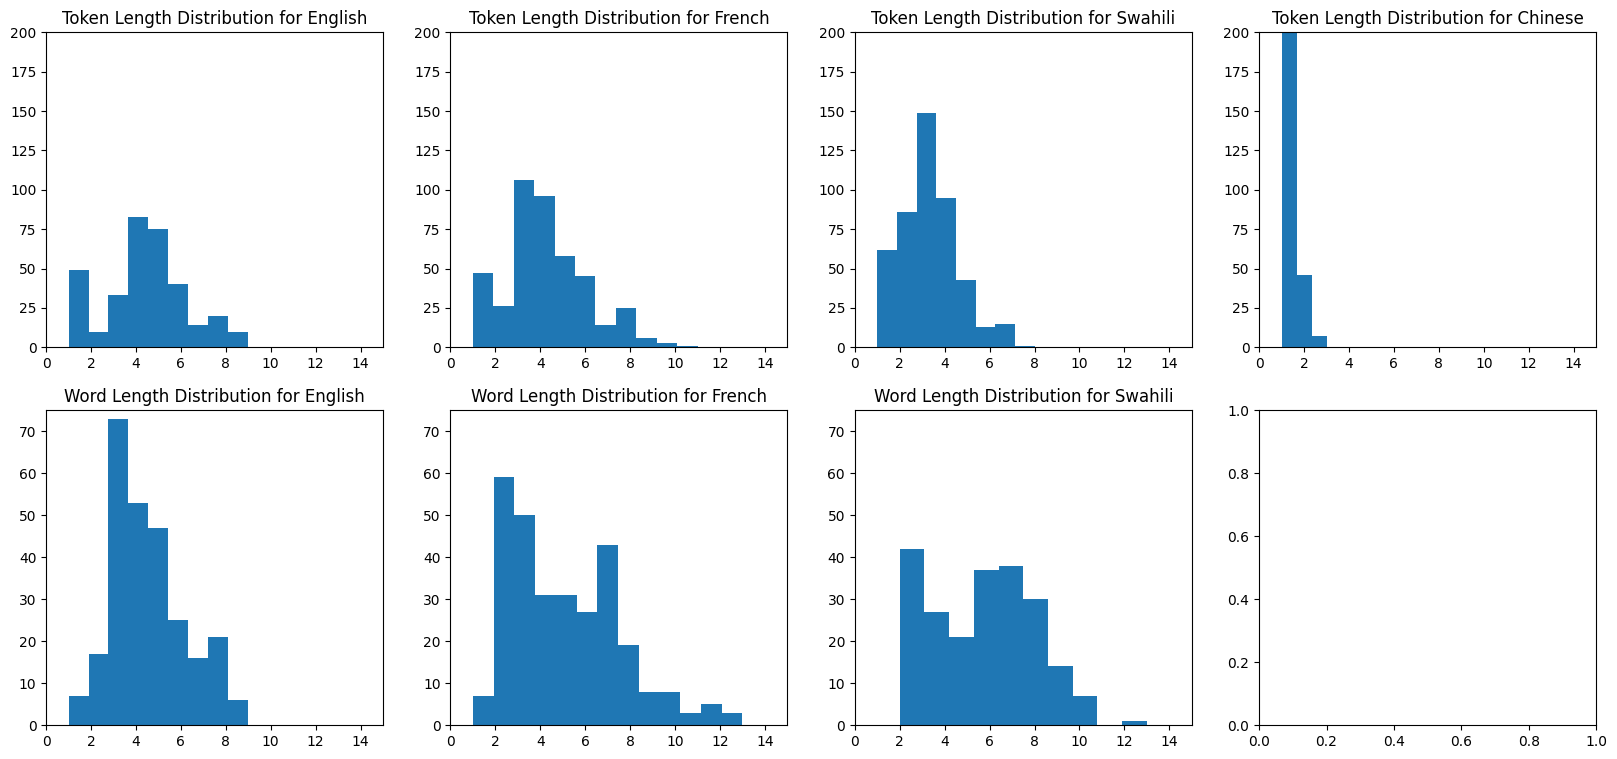

In [ ]:
import matplotlib.pyplot as plt

def plot_token_length_histogram(text, language_name):
    encoding = tiktoken.encoding_for_model('gpt-4o')
    tokens = encoding.encode(text)

    decoded_tokens = [encoding.decode([t]) for t in tokens]
    token_lengths = [len(t) for t in decoded_tokens]
    plt.hist(token_lengths, bins=len(set(token_lengths)))
    plt.title(f'Token Length Distribution for {language_name}')
    plt.xlim([0,15])
    plt.ylim([0,200])

def plot_word_length_histogram(text, language_name):
    if language != 'Chinese':
        word_lengths = [len(t) for t in text.split()]
        plt.hist(word_lengths, bins=len(set(word_lengths)))
        plt.title(f'Word Length Distribution for {language_name}')
        plt.xlim([0,15])
        plt.ylim([0,75])

plt.figure(figsize=(20, 9))

for i, language in enumerate(['English', 'French', 'Swahili', 'Chinese']):
    # Token length histograms
    plt.subplot(2, 4, 1 + i)
    plot_token_length_histogram(excerpts[language], language)

    # Word length histograms
    plt.subplot(2, 4, 5 + i)
    plot_word_length_histogram(excerpts[language], language)


Which peculiarities do you observe?

**Task 1.3.** Check how the tokenizer splits the Chinese text. You will find that some of the tokens are strange and have no clear correspondence in the text. Why do we have such tokens?

# Task 2. Book summarization with LLMs

The credit for this task goes to Alex Umnov, who created this task for our [Practical Generative AI](https://academy.nebius.com/generative-ai) course.

LLMs are great tools for summarization, but they are not able to process arbitrary long texts, and even less in languages different from English. So, what if we want to summarize a whole book? Let's try to make a workaround for this.

To test our solutions we will be using CMU dataset for book summarization. Let's start with downloading a sample of book dataset from huggingface

```
@article{kryscinski2021booksum,
      title={BookSum: A Collection of Datasets for Long-form Narrative Summarization},
      author={Wojciech Kry{\'s}ci{\'n}ski and Nazneen Rajani and Divyansh Agarwal and Caiming Xiong and Dragomir Radev},
      year={2021},
      eprint={2105.08209},
      archivePrefix={arXiv},
      primaryClass={cs.CL}
}
```

In [ ]:
!curl -X GET \
     "https://datasets-server.huggingface.co/rows?dataset=kmfoda%2Fbooksum&config=default&split=train&offset=0&limit=100" > book_sum_dataset.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3771k  100 3771k    0     0  2373k      0  0:00:01  0:00:01 --:--:-- 2374k


In [ ]:
import json

book_dataset = json.load(open("book_sum_dataset.txt"))

Let's look at one row of our database. Beware: a large text will get printed.

In [ ]:
book_dataset['rows'][5]

**Task 2.1.** Use `tiktoken` to calculate mean and maximal length of the chapters in GPT-4o-mini tokens.

In [ ]:
!pip install -q openai tiktoken

In [ ]:
import os

with open("openai_api_key", "r") as file:
    openai_api_key = file.read().strip()

os.environ["OPENAI_API_KEY"] = openai_api_key

with open("nebius_api_key", "r") as file:
    nebius_api_key = file.read().strip()

os.environ["NEBIUS_API_KEY"] = nebius_api_key

In [ ]:
import openai
import tiktoken
import nltk
import urllib3.exceptions
from google.colab import userdata
nltk.download('punkt')

from openai import OpenAI

CHUNK_SIZE_LIMIT = 2500

def summarise_with_llm(text: str, client, model):
    completion = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "system",
                "content": "You are an expert text summarizer."
            },
            {
                "role": "user",
                "content": f"""Write a concise summary of the following text:

TEXT: {text}"""},
        ]
    )

    return completion.choices[0].message.content

def summarize_long_text_with_chatgpt(chapter: str, client, model, encoding) -> str:
    target_length = len(chapter) // 4
    current_chapter = chapter

    iteration = 0
    while len(current_chapter) > target_length:
        print(f"Iteration {iteration} length: {len(current_chapter)}")
        print(f"Running iteration {iteration}")
        sentences = nltk.sent_tokenize(current_chapter)
        chunks = []
        current_chunk = ""
        for sentence in sentences:
            if len(encoding.encode(current_chunk)) + len(encoding.encode(sentence)) > CHUNK_SIZE_LIMIT:
                chunks.append(current_chunk)
                current_chunk = sentence
            else:
                current_chunk += sentence
        if len(current_chunk) > 0:
            chunks.append(current_chunk)

        summarized_chunks = [summarise_with_llm(chunk, client, model) for chunk in chunks]
        current_chapter = "".join(summarized_chunks)
        iteration += 1

    return current_chapter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
model = 'gpt-4o-mini'
client = OpenAI()
encoding = tiktoken.encoding_for_model(model)

sample_chapter = book_dataset['rows'][0]['row']['chapter']
summarized_chapter = summarize_long_text_with_chatgpt(
    sample_chapter,
    client=client,
    model=model,
    encoding=encoding
    )
print('SUMMARY:', summarized_chapter[:200])
print()
print('SUMMARY LENGTH', len(summarized_chapter))
assert len(summarized_chapter) < len(sample_chapter) // 2

Iteration 0 length: 40844
Running iteration 0
SUMMARY: The text describes the brutal colonial warfare between France and England in North America, emphasizing the challenges faced by soldiers traversing vast, treacherous wilderness to engage in battle. It

SUMMARY LENGTH 3168


You'll see that the chapter lengths are not too large, they would still fit into the context length of GPT-4o-mini or Meta-Llama-3.1-405B-Instruct, but

(a) We already know that not some texts are much larger that 128k tokens, so that we need to learn how to summarize a text without loading it all in one prompt, and

(b) LLM capabilities wane at larger context lengths, so if we can process a text in shorter chunks, it's good for us.

What we'll do is:
1. Split the text into smaller chunks.
2. Summarize each of the chunks.
3. Concatenate all the summaries. If the total length is still above our chosen threshold, repeat the steps 1 and 2 until it's ok.
4. Summarize the concatenations of the summaries.

## Your task

Write a function

```summarize_long_text_with_chatgpt(chapter: str) -> str```

implementing the above method of summarization.

Don't forget to log the lengths each iteration to see how much the texts shrink.

For a given example, please analyse your intermediate and final results. Is it indeed a good summary of the text?

**Hints and suggestions**:
- Keep in mind, that MAX TOKENS restrictions takes into account both prompt and completion. So, you also need to leave some tokens for a response. So we'd suggest using at least 2:1 token ratio for chapter and summary.
- You can control the length of the summary with prompts.
- If you just use `split(".")`, you won't get a proper splitting into sentences. Luckily we have convenient Python libraries for text processing. We recommend using `sent_tokenize` from the `nltk` library (but you'll need to run `nltk.download('punkt')` before using it). You can also try splitting the text into chunks of paragraphs instead.
- It's difficult to measure the quality of summarization, but please analyze at lease two examples. Are the summaries coherent?
- If you need inspiration in prompt building, take a look at this [paper](https://arxiv.org/pdf/2312.16171v1.pdf)

In [ ]:
CHUNK_SIZE_LIMIT = 2500

def summarize_long_text_with_chatgpt(chapter: str) -> str:
    # <YOUR CODE HERE>

## Part 3. Exploring LLM behaviour on more and less frequent tasks

This part is inspired by the [Embers of Autoregression](https://arxiv.org/pdf/2309.13638) paper, which argues that the success of solving a problem with an LLM depends on how typical are

- the input,
- the output,
- and the task itself in the LLM's training data.

At the lecture, we witnessed how the output frequency (200 vs 201) influences it, and now we'll talk about the task and the input.

A **Caesar cipher** shifts all the characters in the word by the same number of positions (which is called **shift**). This is a simple and well-known cipher type, so there are many examples in the net, and some of those get into the LLM training datasets. However, not all ciphers are equally popular. As the authors of 'Embers of Autoregression' observe, shift 13 is quite popular and has 1000+ occurences in one of the datasets often used for LLM training, ciphers with other shift values are much more scarse.

In this task, we'll compare how well Llama-3.1-405B deciphers Caesar cipher with shifts 13 and 8.

**Task 3.1.** Use your favourite LLM to create `caesar_cipher` function, which:
- takes arguments `text` (string) and `shift` (int),
- returns the `text` shifted by `shift` positions.

Please check that the function really does what it should! You can never know when an LLM is going to betray you...

In [ ]:
def caesar_cipher(text, shift):
    result = ""

    # <YOUR CODE HERE>

    return result

# Example usage
text = "Hello, World!"
shift = 3
encrypted_text = caesar_cipher(text, shift)
print("Encrypted text:", encrypted_text)

Encrypted text: Khoor, Zruog!


We suggest using the following sentences to assess Llama's deciphering capabilitles, but feel free to check your own phrases as well.

In [ ]:
test_sentences = [
    "The power of knowledge lies in understanding and growth.",
    "Every journey begins with a single step toward the unknown.",
    "Effective communication requires both speaking and listening.",
    "Technology has rapidly transformed the way we connect with others.",
    "Creativity flourishes when freedom and structure are balanced.",
    "Innovation often emerges from unexpected challenges and obstacles.",
    "A well-prepared mind can turn any situation into an opportunity.",
    "Patience and persistence are essential for achieving long-term goals.",
    "Respect for diversity enriches society and promotes understanding.",
   "Success is a journey defined by progress, not perfection."
]

Now, let's check that the openai library is installed.

In [ ]:
!pip install -q openai

Below, we've written an evaluation function for your convenience. It applies the caesar cipher and asks the LLM to decipher it using the prompt from the paper.

In [ ]:
from tqdm import tqdm
from openai import OpenAI
import openai

def check_llm_decipering(
    sentences, shift=13,
    model="meta-llama/Meta-Llama-3.1-405B-Instruct",
    ):

    deciphered_sentences = []
    for sentence in tqdm(test_sentences):
        prompt = f"""Rot-13 is a cipher in which each letter is shifted 13 positions forward in the alphabet.
For example, here is a message written in rot-13 along with the original text that it was created from:
Rot-13 text: “Fgnl urer!”
Original text: “Stay here!”

Here is another message in rot-13. Decode this message to produce the original text.
Rot-13 text: “{caesar_cipher(sentence, shift)}”
Original text:"""
        client = OpenAI(
            base_url="https://api.studio.nebius.ai/v1/",
            api_key=os.environ.get("NEBIUS_API_KEY"),
        )

        completion = client.chat.completions.create(
            model=model,
            messages=[
            {
                "role": "user",
                "content": prompt
            },
            ],
            temperature=0.6,
            max_tokens=1024,
            top_p=0.9
        )

        deciphered_text = completion.choices[0].message.content

        deciphered_sentences.append(deciphered_text)

    return deciphered_sentences

**Task 3.2.** Launch `check_llm_decipering` on `test_sentences` with `shift=13` and `shift=8`. Compare the results.

**Task 3.3.** Experiment with sentences in Simple English and also with sentences containing very rare, comples words. How does word complexity influence deciphering quality?

In [ ]:
# <YOUR CODE HERE>

**Task 3.4${}^*$ (bonus)**. You were probably upset that Llama embarks on a long discussion instead of just giving you the answer. This way, you can check the results with your own eyes, of course, but you can't automate computation of deciphering accuracy.

Next week we'll discuss how to extract the answer from LLM's reasoning using LLMs, but today we suggest you to do it with clever prompting and rule-based extraction.

There are two possible ideas:

- *Idea 1*. Forbidding the LLM to output anything apart from the answer in the prompt. We advise agains it, because

  (a) There is no guarantee that the LLM will actually obey. Some excessive information may still leak into the completion.

  (b) Deciphering quality may suffer.

- *Idea 2*. If we can't forbid LLM from writing a solution, we can still ask it to use a proper formating. For example, you can ask the LLM to write the answer after `FINAL OUTPUT:` without quotes and other punctuation marks around it. You will still need to check that it obeys the format, but this way it will be much easier for you to parse the actual answer from the completion.

Your task is:

- Modify the deciphering prompt in a way that the answer may be conveniently parsed from the completion. You may use our suggestion or come up with your own. You can even ask the LLM to produce a json (maybe, this will work). Just please don't forget to check how well does the LLM keep your chosen formatting.
- Write a function that actually extracts the answer from a completion.
- Calculate word-level accuracy of deciphering: first, for each sentence compute the ratio
$$\frac{\text{How many words are deciphered correctly in the sentence}}{\text{How many words are there in the sentence}}$$
then average these numbers over all sentences in `text_sentences`.
- Compare these numbers for shifts 13 and 8.

## Caesar cipher

This part is inspired by the [Embers of Autoregression](https://arxiv.org/pdf/2309.13638) paper.

A **Caesar cipher** shifts all the characters in the word by the same number of positions (which is called **shift**). We'll compare how Llama-3.1-405B deciphers Caesar cipher with shifts 13 (very popular) and 8 (very unpopular).

In [ ]:
def caesar_cipher(text, shift):
    result = ""

    for char in text:
        if char.isalpha():
            shift_base = ord('A') if char.isupper() else ord('a')
            result += chr((ord(char) - shift_base + shift) % 26 + shift_base)
        else:
            result += char  # Non-alphabet characters remain unchanged

    return result

# Example usage
text = "Hello, World!"
shift = 3
encrypted_text = caesar_cipher(text, shift)
print("Encrypted text:", encrypted_text)

Encrypted text: Khoor, Zruog!


In [ ]:
test_sentences = [
    "The power of knowledge lies in understanding and growth.",
    "Every journey begins with a single step toward the unknown.",
    "Effective communication requires both speaking and listening.",
    "Technology has rapidly transformed the way we connect with others.",
    "Creativity flourishes when freedom and structure are balanced.",
    "Innovation often emerges from unexpected challenges and obstacles.",
    "A well-prepared mind can turn any situation into an opportunity.",
    "Patience and persistence are essential for achieving long-term goals.",
    "Respect for diversity enriches society and promotes understanding.",
   "Success is a journey defined by progress, not perfection."
]

In [ ]:
from tqdm import tqdm
from openai import OpenAI
import openai

def check_llm_decipering(
    sentences, shift=13,
    model="meta-llama/Meta-Llama-3.1-405B-Instruct",
    ):

    n_accurate_decipherings = 0
    deciphering_log = []
    for sentence in tqdm(test_sentences):
        prompt = f"""Rot-{shift} is a cipher in which each letter is shifted {shift} positions forward in the alphabet.
For example, here is a message written in rot-{shift} along with the original text that it was created from:
Rot-{shift} text: “{caesar_cipher("Stay here!", shift)}”
Original text: “Stay here!”

Here is another message in rot-{shift}. Decode this message to produce the original text.
Write the original text after ORIGINAL TEXT: in the end of your answer.
Rot-{shift} text: “{caesar_cipher(sentence, shift)}”
        """
        client = OpenAI(
            base_url="https://api.studio.nebius.ai/v1/",
            api_key=os.environ.get("NEBIUS_API_KEY"),
        )

        completion = client.chat.completions.create(
            model=model,
            messages=[
            {
                "role": "user",
                "content": prompt
            },
            ],
            temperature=0.6,
            max_tokens=1024,
            top_p=0.9
        )
        '''completion = openai.chat.completions.create(
            model=model,
            messages=[
                {
                    "role": "user",
                    "content": prompt},
            ]
        )'''

        deciphered_text = completion.choices[0].message.content
        if deciphered_text == sentence:
            n_accurate_decipherings += 1

        deciphering_log.append(deciphered_text)

    return {
        'accuracy': n_accurate_decipherings / len(test_sentences),
        'log': deciphering_log,
    }

In [ ]:
result = check_llm_decipering(test_sentences, shift=13)

100%|██████████| 10/10 [01:37<00:00,  9.74s/it]


In [ ]:
result

{'accuracy': 0.0,
 'log': ['To decode the message, we need to shift each letter 13 positions backward in the alphabet.\n\nBreaking down the given Rot-13 text:\n- "Gur" becomes "The"\n- "cbjre" becomes "power"\n- "bs" becomes "of"\n- "xabjyrqtr" becomes "knowledge"\n- "yvrf" becomes "lies"\n- "va" becomes "in"\n- "haqrefgnaqvat" becomes "understanding"\n- "naq" becomes "and"\n- "tebjgu" becomes "growth"\n\nORIGINAL TEXT: The power of knowledge lies in understanding and growth.',
  'To decode the message, we need to shift each letter 13 positions backward in the alphabet. \n\nHere is the decoded message:\n- R -> E\n- i -> v\n- r -> e\n- e -> r\n- l -> y\n-  (space remains the same)\n- w -> j\n- b -> o\n- h -> u\n- e -> r\n- a -> n\n- r -> e\n- l -> y\n-  (space remains the same)\n- o -> b\n- r -> e\n- t -> g\n- v -> i\n- a -> n\n- f -> s\n-  (space remains the same)\n- j -> w\n- v -> i\n- g -> u\n- u -> h\n-  (space remains the same)\n- n -> a\n-  (space remains the same)\n- f -> s\n- v 

Let's extract the actual answer:

In [ ]:
def extract_original_text(text):
    start_marker = "ORIGINAL TEXT:"
    if start_marker in text:
        start_index = text.index(start_marker) + len(start_marker)
        return text[start_index:].strip().strip('“').strip('"')
    else:
        return None

def word_match_ratio(true_string, predicted_string):
    if predicted_string is None or len(predicted_string) == 0:
        return 0.0
    true_words = true_string.split()
    predicted_words = predicted_string.split()

    # Find the minimum length to compare words up to the shortest string
    min_length = min(len(true_words), len(predicted_words))

    # Count matching words at the same positions
    matches = sum(1 for i in range(min_length) if true_words[i] == predicted_words[i])

    # Calculate ratio of matches in true_string
    ratio = matches / len(true_words) if len(true_words) > 0 else 0

    return ratio

accuracy_sum = 0
for deciphered_text, sentence in zip(result['log'], test_sentences):
    true_deciphered_text = extract_original_text(deciphered_text)
    accuracy_sum += word_match_ratio(sentence, true_deciphered_text)
    print(true_deciphered_text, '<=>', sentence)
    print()
print('Mean word-by-word accuracy:', accuracy_sum / len(test_sentences))

The power of knowledge lies in understanding and growth. <=> The power of knowledge lies in understanding and growth.

Every journey begins with a single step toward the unknown.” <=> Every journey begins with a single step toward the unknown.

Effective communication requires both speaking and listening. <=> Effective communication requires both speaking and listening.

Technology has completely transformed the way we connect with others. <=> Technology has rapidly transformed the way we connect with others.

Creativity sometimes just requires one ingredient.” <=> Creativity flourishes when freedom and structure are balanced.

Innovation often emerges from unexpected challenges and offsprings.” <=> Innovation often emerges from unexpected challenges and obstacles.

A well-prepared mind can turn any situation into an opportunity. <=> A well-prepared mind can turn any situation into an opportunity.

Patience and perseverance are essential for overcoming long-term goals. <=> Patience and

This was a highly popular shift. Now let's try shift 8:

In [ ]:
result_8 = check_llm_decipering(test_sentences, shift=8)

accuracy_sum = 0
for deciphered_text, sentence in zip(result_8['log'], test_sentences):
    true_deciphered_text = extract_original_text(deciphered_text)
    accuracy_sum += word_match_ratio(sentence, true_deciphered_text)
    print(true_deciphered_text, '<=>', sentence)
    print()
print('Mean word-by-word accuracy:', accuracy_sum / len(test_sentences))

100%|██████████| 10/10 [02:26<00:00, 14.69s/it]

None <=> The power of knowledge lies in understanding and growth.

Every journey bears a serial arrest before orderly real lord ever order. <=> Every journey begins with a single step toward the unknown.

Errcnipe greetingevery everyone stay cheerful and thankful <=> Effective communication requires both speaking and listening.

None <=> Technology has rapidly transformed the way we connect with others.

Shaqjnyjo vleohyiqai moal vhaaoes qlo ijhosjocha qha oqlqlsao <=> Creativity flourishes when freedom and structure are balanced.

It is obvious that people often look backwards in old photographs. <=> Innovation often emerges from unexpected challenges and obstacles.

A worry rural area stay here again and something needs to be discussed. <=> A well-prepared mind can turn any situation into an opportunity.

Rational and reasonable and important for everyone today-most often.” <=> Patience and persistence are essential for achieving long-term goals.

Reserve our libraries everywhere exc